## Final Project Submission

Please fill out:
* Student name: Farnaz Golnam
* Student pace: Full time
* Scheduled project review date/time: Feb 24th, 12pm PST
* Instructor name: Rafael Cassaro
* Blog post URL: To be updated


# Data Cleaning Process:
1. importing libraries and available data files
2. Ckecking for missing data and placeholders
3. checking for data types
4. checking for duplicateds and outliers
5. save the final clean dataset to work with

# 1. Importing libraries and availeble data files

In [955]:
# import neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle

In [842]:
#pd.get_option("display.max_rows")
pd.set_option("display.max_rows", 400)

In [843]:
# import the data file
df=pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# 2.checking for missing data and placeholders

In [844]:
print(df.columns)
df.isna().sum()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

based on the information above, we know how many missing data we have in the entire data frame and the columns they are
located, BUT, it does not help us to identify whether there is any placeholders like "?" or "#" among values or not.
To do so:
1. we can either slice the dataframe in smaller sections and scan the information,
2. or we can check the value_counts or unique values of each column for further investigation.

In [845]:
df.shape

(21597, 21)

df.shape shows that we have 21597 row to be scanned, so even if we change the pandas max_rows to display more rows each slice, probably it is still not a good option to use this method.
1. for example check the first 300 rows: df.head(300) 
   , or check the last 300 rows : df.tail(300)
2. check the data from row 0 to 60, for all columns: df[0:60]
   check the data from row 60 to 120, for all columns: df[60:120]
   ,and so on ....
3. chenge the dataframe display setting to show mor rows: pd.set_option("display.max_rows", 600)




so, we check for placeholders in every columns of the dataframe using unique() function and the for loop below:

In [846]:
#instead of applying the codeline below for each feature of the dataframe, we use the forloop below to iterate over columns:
#print(df.bedrooms.value_counts())
#or
#print(df.bedrooms.unique())

for column in df:
    #Select column contents by column name using [] operator
    columnSeriesdf = df[column]
    print('Colunm Name : ', column)
    print('Column Contents : ', columnSeriesdf.unique())
    
    
#or we can select column by index:
#for index in range(0,21):
    #columnSeriesdf = df.iloc[: , index]
    #print('Colunm Name : ',column)
    #print('Column Contents : ', columnSeriesdf.unique())

Colunm Name :  id
Column Contents :  [7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]
Colunm Name :  date
Column Contents :  ['10/13/2014' '12/9/2014' '2/25/2015' '2/18/2015' '5/12/2014' '6/27/2014'
 '1/15/2015' '4/15/2015' '3/12/2015' '4/3/2015' '5/27/2014' '5/28/2014'
 '10/7/2014' '1/24/2015' '7/31/2014' '5/29/2014' '12/5/2014' '4/24/2015'
 '5/14/2014' '8/26/2014' '7/3/2014' '5/16/2014' '11/20/2014' '11/3/2014'
 '6/26/2014' '12/1/2014' '6/24/2014' '3/2/2015' '11/10/2014' '12/3/2014'
 '6/13/2014' '12/30/2014' '2/13/2015' '6/20/2014' '7/15/2014' '8/11/2014'
 '7/7/2014' '10/28/2014' '7/29/2014' '7/18/2014' '3/25/2015' '7/16/2014'
 '4/28/2015' '3/11/2015' '9/16/2014' '2/17/2015' '12/31/2014' '2/5/2015'
 '3/3/2015' '8/19/2014' '4/7/2015' '8/27/2014' '2/23/2015' '12/10/2014'
 '8/28/2014' '10/21/2014' '12/7/2014' '6/3/2014' '9/9/2014' '10/9/2014'
 '8/25/2014' '6/12/2014' '9/12/2014' '1/5/2015' '6/10/2014' '7/10/2014'
 '3/16/2015' '11/5/2014' '4/20/2015' '6/9/2014' '3/

### After checking all the features in the dataframe, we got to the following results:

1. squr_basement has some placeholders "?" which needs to be cleaned, we will drop the rows that has the "?", because we dont know if assuming "?" as no basement or 0 can have a reverse affect on our analyze.

2. yr_renovated has missing data, NaNs, based on our assumptions we can consider NaN as no renovation or 0, so we replace NANs with 0 in yr_renovated column. 
3. we will do the same for the view column and assume that NaN view can be considered as 0 view.

4. waterfront column has missing values, NaNs too, again we dont know if assuming NaN as no waterfront or 0 can have a reverse affect on our analyze, most certainly being a waterfront house has some effects on its price, so we just drop those missing datas.


### cleaning "sqr_basement" feature:

In [847]:
#first we drop unknown basement informations:
df_clean_basement= df.drop(df[df['sqft_basement']=="?"].index,inplace=False)
#then we check how many data we will miss dropping unknown basement informations by comparing the values
#of original and cleand dataframe, we dont miss unresonable amount of data so we can still drop "?"
#we could also examine that through the code line: df.sqr_basement.value_counts()
print("df.shape","=", df.shape)
print("df_clean_basement","=", df_clean_basement.shape)

df.shape = (21597, 21)
df_clean_basement = (21143, 21)


### cleaning "waterfront" feature:

In [848]:
df_clean_waterfront=df.dropna(subset=["waterfront"], how="any", inplace=False)
print("df.shape","=", df.shape)
print("df_clean_waterfront","=", df_clean_waterfront.shape)
# we will use substantial amount of data, but in my point of view as a data scientist, its better to work on smaller but
# reliable amount of data than huge but unrelible data sets.

df.shape = (21597, 21)
df_clean_waterfront = (19221, 21)


In [849]:
# so we drop all the unnecessary data from our original datafram without inplacing the changes in the original dataframe:
df_clean_basement= df.drop(df[df['sqft_basement']=="?"].index,inplace=False)
df_clean = df_clean_basement.dropna(subset=["waterfront"], how="any", inplace=False)
print("df_clean","=", df_clean.shape)
#df_clean.head(300)

df_clean = (18804, 21)


We lost 2793 rows by dropping all the placeholders and missing datas in sqr_basement and waterfront features from the original dataframe we had. our current dataframe to work with is df_clean.

### filling missing values in "view" and "yr_renovated" columns

In [850]:
df_clean["view"].fillna(0, inplace=True)
df_clean.view.unique()

C:\Users\farnaz\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


array([0., 3., 4., 2., 1.])

In [851]:
print("yr_renovation values before filling missing values:", "\n", df_clean.yr_renovated.unique() )
df_clean["yr_renovated"].fillna(0.0, inplace=True)
print("yr_renovation values after filling missing values:", "\n", df_clean.yr_renovated.unique() )

yr_renovation values before filling missing values: 
 [1991.   nan    0. 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1990. 1988. 1977. 1981. 1995. 2000. 1999. 1998.
 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 1980. 1971. 1945. 1979.
 1997. 1950. 1969. 1948. 2009. 2015. 2008. 2012. 1968. 1963. 1951. 1962.
 2001. 1953. 1993. 1955. 1996. 1982. 1956. 1940. 1976. 1975. 1964. 1973.
 1957. 1959. 1960. 1965. 1967. 1934. 1972. 1944. 1958. 1974.]
yr_renovation values after filling missing values: 
 [1991.    0. 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984. 1954.
 2014. 2011. 1983. 1990. 1988. 1977. 1981. 1995. 2000. 1999. 1998. 1970.
 1989. 2004. 1986. 2007. 1987. 2006. 1985. 1980. 1971. 1945. 1979. 1997.
 1950. 1969. 1948. 2009. 2015. 2008. 2012. 1968. 1963. 1951. 1962. 2001.
 1953. 1993. 1955. 1996. 1982. 1956. 1940. 1976. 1975. 1964. 1973. 1957.
 1959. 1960. 1965. 1967. 1934. 1972. 1944. 1958. 1974.]


In [852]:
df_clean.yr_renovated.value_counts().sort_index()

0.0       18171
1934.0        1
1940.0        2
1944.0        1
1945.0        1
1948.0        1
1950.0        1
1951.0        1
1953.0        1
1954.0        1
1955.0        2
1956.0        3
1957.0        2
1958.0        3
1959.0        1
1960.0        3
1962.0        1
1963.0        3
1964.0        5
1965.0        3
1967.0        1
1968.0        4
1969.0        4
1970.0        8
1971.0        1
1972.0        3
1973.0        4
1974.0        1
1975.0        5
1976.0        1
1977.0        7
1978.0        3
1979.0        6
1980.0        6
1981.0        3
1982.0        7
1983.0       11
1984.0       13
1985.0       11
1986.0       11
1987.0       13
1988.0       10
1989.0       15
1990.0       22
1991.0       11
1992.0       12
1993.0       10
1994.0       12
1995.0        8
1996.0       10
1997.0       12
1998.0       14
1999.0       13
2000.0       25
2001.0       11
2002.0       15
2003.0       24
2004.0       17
2005.0       27
2006.0       18
2007.0       24
2008.0       15
2009.0  

As we can see here, we have lots of 0 for the year of renovation, the difference between 0 and other years starting at 1934 can create outliers for our data, so we have to think of some ways to prevent this:
#option1: creating categorical column for the yr_renovated and put 0 into never category, this option may add more complication while interpreting the data for further analysis.
#option2: droping NANs which still is not a good idea because we will loose another 3842 rows according to info() function.
#option3: dropping the column yr_renovated, but its wiser to first check for multicoliniarity of features then decide on dropping columns.
#option4: replace all zeros with the corresponding yr_built, because it eliminates zeros as outliers and the information we manipulate in the dataframe is still accurate. 

In [853]:
#here is the code block to run the first option, we can also leave the dataframe as it is for now and first explore
#outliers, duplicates and multiculiniarity then come back to choose between our options.

#bins = [0., 1930., 1940., 1950., 1960., 1970., 1980., 1990., 2000., 2010., 2015.]
#categories= ['never','1930-1940', '1940-1950', '1950-1960', '1960-1970', '1980-1990', '1990-2000', '2000-2010', '2010-2015','2015-2020']
#so now we create a new series inside the dataframe and call it decade of renovation instead of year of renovation:
#df_clean["dec_renovated"] = pd.cut(df_clean["yr_renovated"], bins, labels=categories, right=False)

#print(df.dec_renovated.unique())

# now we put all the null values into category 'never'
#df.dec_renovated.fillna('never', inplace=True)

#print(df.dec_renovated.value_counts())

### so, the result of our section 2 operations is:
1. a dataframe df_clean with 18804 rows and 21 columns.
2. all the placeholders and null values have been removed or replaced.


Our dataframe is ready for next section:

# 3. checking for data types.

In [854]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18804 entries, 1 to 21596
Data columns (total 21 columns):
id               18804 non-null int64
date             18804 non-null object
price            18804 non-null float64
bedrooms         18804 non-null int64
bathrooms        18804 non-null float64
sqft_living      18804 non-null int64
sqft_lot         18804 non-null int64
floors           18804 non-null float64
waterfront       18804 non-null float64
view             18804 non-null float64
condition        18804 non-null int64
grade            18804 non-null int64
sqft_above       18804 non-null int64
sqft_basement    18804 non-null object
yr_built         18804 non-null int64
yr_renovated     18804 non-null float64
zipcode          18804 non-null int64
lat              18804 non-null float64
long             18804 non-null float64
sqft_living15    18804 non-null int64
sqft_lot15       18804 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.2+ MB


### we have 2 columns 'sqft_basement' and 'date' that are objects.
1. convert 'date' to datetime type.
2. convert 'sqft_basement' to int type, because it needs to be a number with the exact decimals

### work on data column:

In [855]:
#Convert date to datetime type
df_clean["date"] = pd.to_datetime(df_clean.date)

C:\Users\farnaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### work on Sqft Basement column:

In [856]:
#Convert sqft_basement to a number
#df_clean['sqft_basement']= df_clean['sqft_basement'].astype(float)
#or
df_clean.sqft_basement = df_clean.sqft_basement.astype(float)

C:\Users\farnaz\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [857]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18804 entries, 1 to 21596
Data columns (total 21 columns):
id               18804 non-null int64
date             18804 non-null datetime64[ns]
price            18804 non-null float64
bedrooms         18804 non-null int64
bathrooms        18804 non-null float64
sqft_living      18804 non-null int64
sqft_lot         18804 non-null int64
floors           18804 non-null float64
waterfront       18804 non-null float64
view             18804 non-null float64
condition        18804 non-null int64
grade            18804 non-null int64
sqft_above       18804 non-null int64
sqft_basement    18804 non-null float64
yr_built         18804 non-null int64
yr_renovated     18804 non-null float64
zipcode          18804 non-null int64
lat              18804 non-null float64
long             18804 non-null float64
sqft_living15    18804 non-null int64
sqft_lot15       18804 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.2

our datatypes are all appropriate and ready for next steps:

#  4.Check for duplicates and outliers

### To find duplicates:
1. we can either go through each column and check for duplicates which is not a resonable method, because we may have some rows in a particular column that has the same values but the same row in the correspondant column has a different information, so we can not drop the entire row based on finding duplicates in one column.
2. we can check the 'id' column, if we have two similar 'id' number then the probabilty of any mistake or duplicate is much higher and we can scan those rows and make a decision.

In [858]:
#first check for the duplicates in the entire data frame as below:
#df_clean.duplicated().sum() 
#the result shows 0 which is not reliable

#then we will check duplicates for each and every columns as below:
for column in df_clean:
    #Select column contents by column name using [] operator
    columnSeriesdf_clean = df_clean[column]
    print('Colunm Name : ', column)
    print('number of duplicates: ', columnSeriesdf_clean.duplicated().sum())   

#it shows the column "id" has 130 duplicates

Colunm Name :  id
number of duplicates:  130
Colunm Name :  date
number of duplicates:  18434
Colunm Name :  price
number of duplicates:  15450
Colunm Name :  bedrooms
number of duplicates:  18792
Colunm Name :  bathrooms
number of duplicates:  18775
Colunm Name :  sqft_living
number of duplicates:  17821
Colunm Name :  sqft_lot
number of duplicates:  9869
Colunm Name :  floors
number of duplicates:  18798
Colunm Name :  waterfront
number of duplicates:  18802
Colunm Name :  view
number of duplicates:  18799
Colunm Name :  condition
number of duplicates:  18799
Colunm Name :  grade
number of duplicates:  18793
Colunm Name :  sqft_above
number of duplicates:  17908
Colunm Name :  sqft_basement
number of duplicates:  18505
Colunm Name :  yr_built
number of duplicates:  18688
Colunm Name :  yr_renovated
number of duplicates:  18735
Colunm Name :  zipcode
number of duplicates:  18734
Colunm Name :  lat
number of duplicates:  13880
Colunm Name :  long
number of duplicates:  18065
Colunm Nam

In [859]:
#to investigate the duplicated values in ''id' column:
duplicates = df_clean[df_clean.duplicated(subset='id', keep=False)]
duplicates

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,2014-07-25,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,2014-06-18,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
345,3969300030,2014-07-23,165000.0,4,1.00,1000,7134,1.0,0.0,0.0,...,6,1000,0.0,1943,0.0,98178,47.4897,-122.240,1020,7138
346,3969300030,2014-12-29,239900.0,4,1.00,1000,7134,1.0,0.0,0.0,...,6,1000,0.0,1943,0.0,98178,47.4897,-122.240,1020,7138
717,8820903380,2014-07-28,452000.0,6,2.25,2660,13579,2.0,0.0,0.0,...,7,2660,0.0,1937,1990.0,98125,47.7142,-122.286,1120,8242
718,8820903380,2015-01-02,730000.0,6,2.25,2660,13579,2.0,0.0,0.0,...,7,2660,0.0,1937,1990.0,98125,47.7142,-122.286,1120,8242
836,8682262400,2014-07-18,430000.0,2,1.75,1350,4003,1.0,0.0,0.0,...,8,1350,0.0,2004,0.0,98053,47.7176,-122.033,1350,4479
837,8682262400,2015-05-13,419950.0,2,1.75,1350,4003,1.0,0.0,0.0,...,8,1350,0.0,2004,0.0,98053,47.7176,-122.033,1350,4479


the results above show that we have a repeated id number for each row shown in duplicates dataframe, but their price and dates are different as we can see below:

In [860]:
duplicates.date.unique()

array(['2014-07-25T00:00:00.000000000', '2014-12-23T00:00:00.000000000',
       '2014-06-18T00:00:00.000000000', '2014-12-09T00:00:00.000000000',
       '2014-07-23T00:00:00.000000000', '2014-12-29T00:00:00.000000000',
       '2014-07-28T00:00:00.000000000', '2015-01-02T00:00:00.000000000',
       '2014-07-18T00:00:00.000000000', '2015-05-13T00:00:00.000000000',
       '2014-07-17T00:00:00.000000000', '2015-04-20T00:00:00.000000000',
       '2014-09-09T00:00:00.000000000', '2015-02-13T00:00:00.000000000',
       '2014-09-22T00:00:00.000000000', '2015-05-04T00:00:00.000000000',
       '2015-04-28T00:00:00.000000000', '2014-05-13T00:00:00.000000000',
       '2015-01-07T00:00:00.000000000', '2014-06-27T00:00:00.000000000',
       '2015-04-01T00:00:00.000000000', '2015-04-29T00:00:00.000000000',
       '2014-11-07T00:00:00.000000000', '2015-02-26T00:00:00.000000000',
       '2014-08-20T00:00:00.000000000', '2015-02-25T00:00:00.000000000',
       '2014-09-12T00:00:00.000000000', '2015-03-26

In [861]:
duplicates.price.unique()

array([ 430000.,  700000., 1380000., 1400000.,  165000.,  239900.,
        452000.,  730000.,  419950.,  360000.,  550000.,  272000.,
        369000.,  263000.,  510000.,  250275.,  435000.,  757000.,
        765000.,  140000.,  235000.,  250000.,  320000.,  195000.,
        322000.,  260000.,  575000.,  340000.,  537000.,  169575.,
        170000.,  921500.,  525000.,  650000.,  405000.,  625000.,
        149000.,  284700.,  160000.,  255500.,  216000.,  390000.,
        875000.,  940000.,  348500.,  370000., 1900000., 1940000.,
        424240.,  589950.,  367500.,  595000.,  345000.,  365000.,
        368250.,  580000.,  215000.,  315000.,  480000.,  647500.,
        225000.,  295000.,  326000.,  310000.,  539000.,  470000.,
        118125.,  212000.,  358000., 1210000., 1200000.,  120000.,
        175000.,  375000.,  200000.,  259950.,   82000.,  219900.,
        545000.,  302100.,  270000.,  840000.,  350000.,  740000.,
        229000.,  145000.,  255000.,  169100.,  220500.,  3290

this shows the effect of selling the same property in different dates on the price of the property, so thats not the factor we can eliminate from the dataframe, So we decide to not drop any of the duplicated values and move on to the next step which is finding outliers:

# Deal with outliers

### To ease the discovery of outliers, we will use visualization methods(easiest ones) rather mathematical:

1. we will separate our dataset as the target and features, in our project the housing price is the target or dependant variable and other attributes of dataframe which affects the price are our features or independent variables.

2. we will use histograms and boxplots to check distribution of data and find outliers.


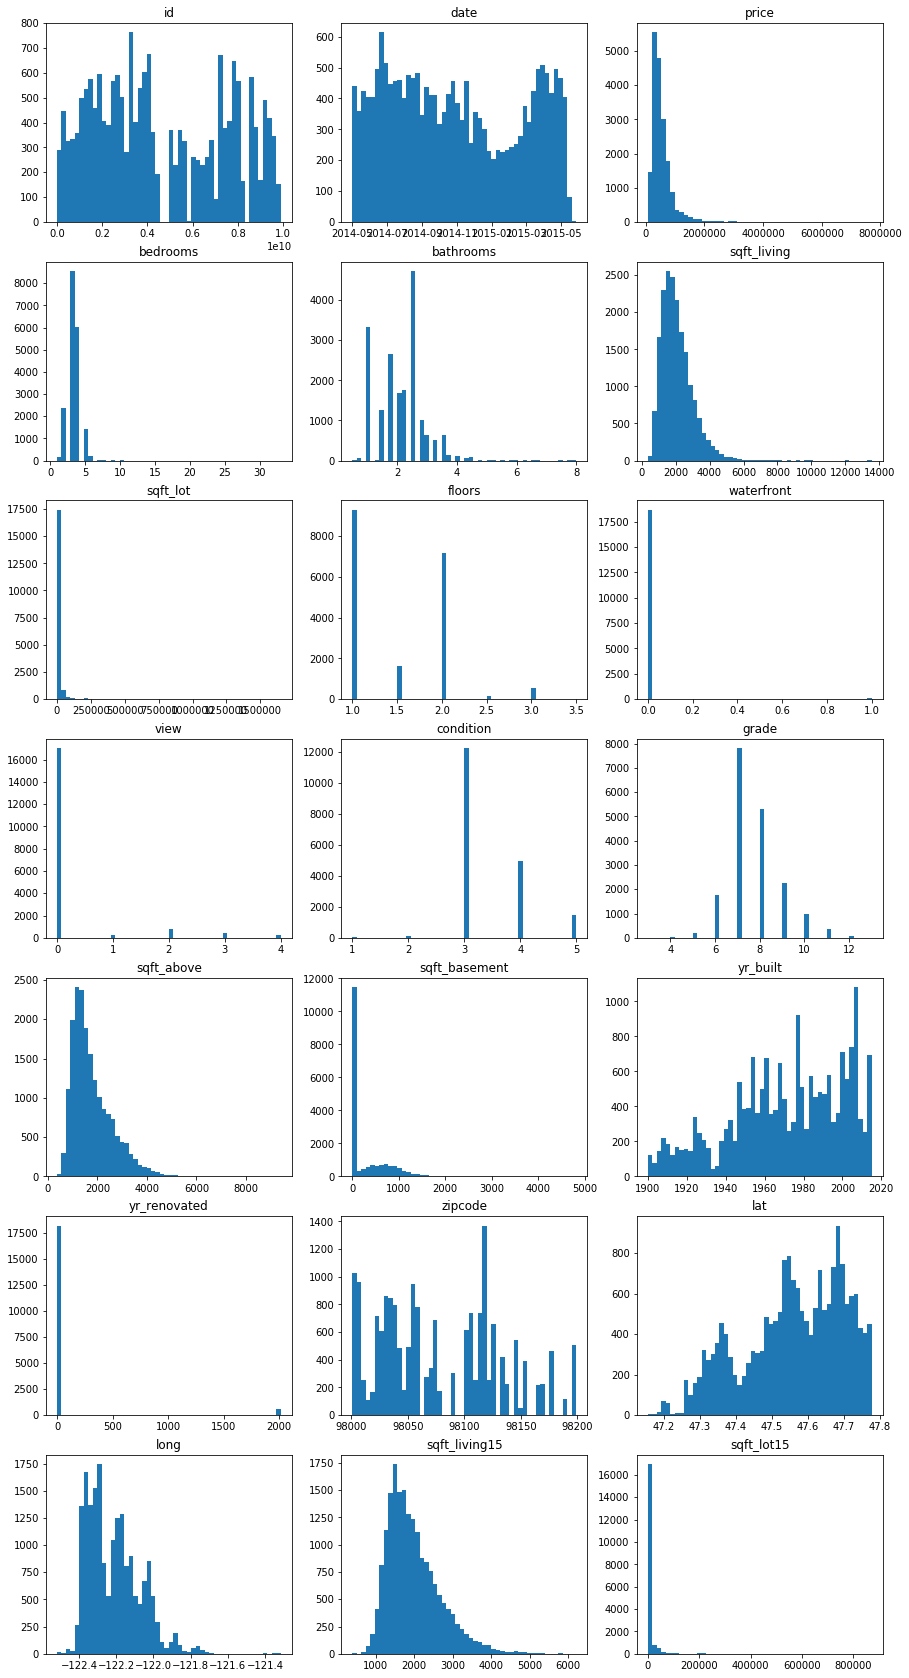

In [862]:
#we have 21 columns/features to observe but 2 of then are index and id , so we only iterate over the other 19 columns.

fig, axs = plt.subplots(7, 3, figsize=(15,30))

for index, ax in enumerate(axs.flatten()):
    #???????????how to only iterate overindex 4 to 21?????
    if index<21:
        column = df_clean.columns[index]
        ax.hist(df_clean[column], bins=50)
        ax.set_title(column)
    
plt.show()
# ?????? how to delete the first 3 subplot in the first row???????? fig.delaxes(axs[1])

### Observations:
### by looking at our histagrams we can see that there are lots of non-normal distributions and categorical data.

### To remove outliers:
1. For categorical features: by dropping the category that appears way less or more than other categories, exp: around 20 times.

2. For numeric features: by dropping the extreme values from the feature.



# 1.Dropping outliers from for categorical variables:
### based on our infoemation from histplots we have few features which are categorical:
"bedrooms","bathrooms","floors","waterfront","view","condition","grade" and "zipcode"

## 1a) dropping bedrooms and bathrooms outliers :

In [863]:
#to have both two features in one box:
#df[['bedrooms', 'bathrooms']].plot(kind='box', vert=False, figsize=(16,3))

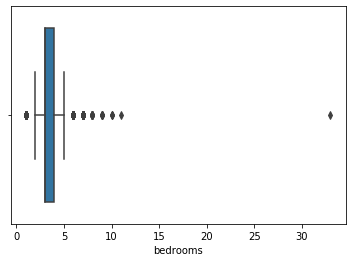

In [864]:
#df['bedrooms'].plot(kind='box', vert=False, figsize=(16,2))
sns.boxplot(x=df_clean['bedrooms'])

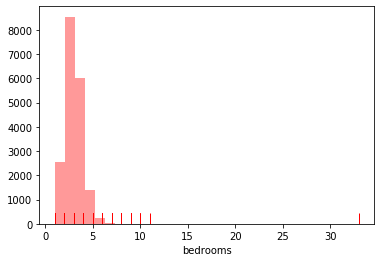

In [865]:
#df.bedrooms.value_counts().plot.bar(rot=0, sort_columns=True, title="bedrooms", figsize=(5,3))
sns.distplot(df_clean['bedrooms'], bins=30, kde=False, rug=True, color="red")

### so clearly, we have outliers for bedrooms, houses with number of bedrooms more than 8 are very few, we decide to keep bedrooms up to 8 and drop the extra.

In [866]:
df_clean = df_clean.loc[df_clean['bedrooms']<8]
df_clean['bedrooms'].unique()

array([3, 2, 4, 5, 1, 6, 7], dtype=int64)

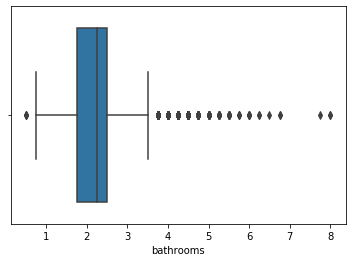

In [867]:
sns.boxplot(x=df_clean['bathrooms'])

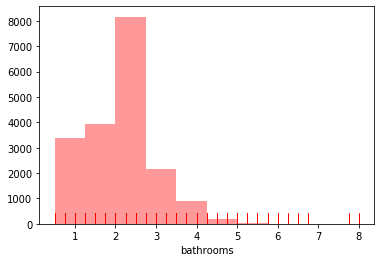

In [868]:
sns.distplot(df_clean['bathrooms'], bins=10, kde=False, rug=True, color="red")

### as we can see for the bathrooms we have outliers and also lots of confusing information regarding half and quarter bathrooms.
we decide to round off all quarter bathrooms and drop outliers of bigger than 5.5 according to our boxplot.

In [869]:
#df_clean1 = df_clean.copy(deep=True)
df_clean['bathrooms'] = df_clean['bathrooms'].apply(lambda x : math.trunc(2.0*x)/2.0, )
df_clean['bathrooms'].unique()


array([2. , 1. , 3. , 4.5, 1.5, 2.5, 4. , 3.5, 0.5, 5. , 6. , 5.5, 6.5,
       8. , 7.5])

In [870]:
# To eliminate bathroom outliers for bathroom numbers more than 4
def Nbaths(value):
    if value > 5.5:
        return 5.5
    else:
        return value



#df_clean1 = df_clean.copy(deep=True)
df_clean['bathrooms'] = df_clean['bathrooms'].apply(lambda x: Nbaths(x))
df_clean['bathrooms'].unique()

array([2. , 1. , 3. , 4.5, 1.5, 2.5, 4. , 3.5, 0.5, 5. , 5.5])

## 1b) dropping floors, waterfront and view outliers :

In [871]:
#sns.boxplot(x=df_clean["floors"])

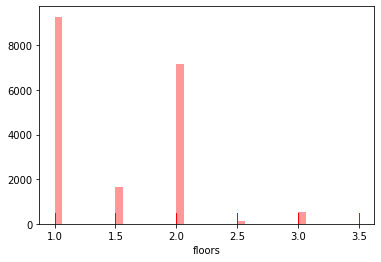

In [872]:
sns.distplot(df_clean['floors'], bins=40, kde=False, rug=True, color="red")

In [873]:
df_clean.floors.value_counts().sort_index()

1.0    9290
1.5    1637
2.0    7182
2.5     138
3.0     530
3.5       5
Name: floors, dtype: int64

there is also some half floors in this feature which most certainly indicates The floor area ratio (FAR): the relationship between the total amount of usable floor area that a building has, or has been permitted to have and the total area of the lot on which the building stands. A higher ratio is more likely to indicate a dense or urban construction. So for accuracy of our data we keep the half floors. 
there is only 5 house with the outlier of 3.5 floors which we consider dropping

In [874]:
df_clean = df_clean.loc[df_clean['floors']<3.5]
df_clean['floors'].unique()

array([2. , 1. , 1.5, 3. , 2.5])

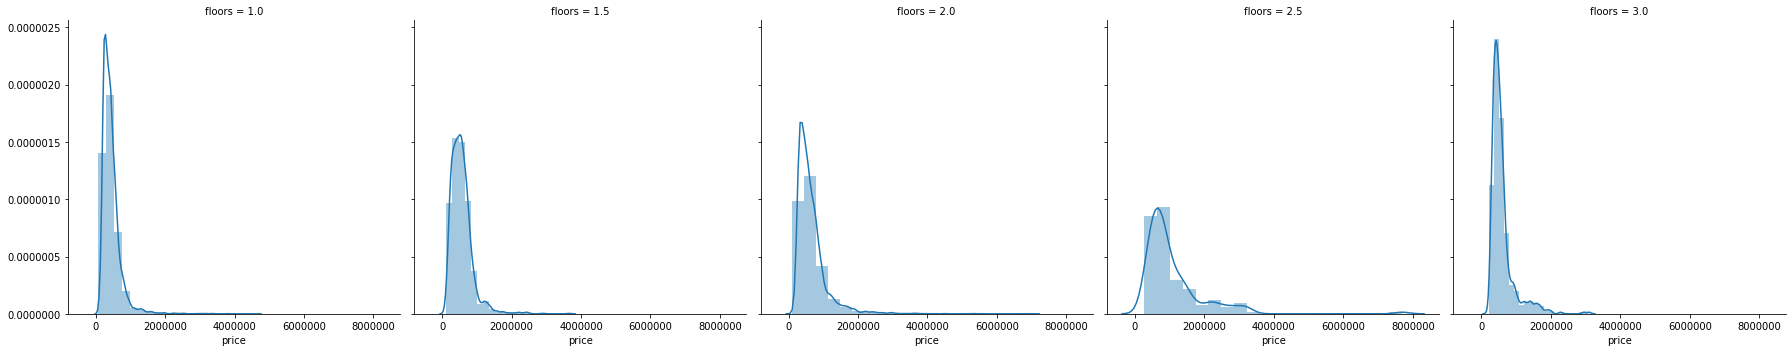

In [875]:
g = sns.FacetGrid(df_clean, col="floors", margin_titles=True, height=5)
g = g.map(sns.distplot , "price", bins=20)

In [876]:
#sns.boxplot(x=df_clean["waterfront"])
#sns.distplot(df_clean['waterfront'], bins=40, kde=False, rug=True, color="red")

In [877]:
df_clean.waterfront.value_counts().sort_index()

0.0    18635
1.0      142
Name: waterfront, dtype: int64

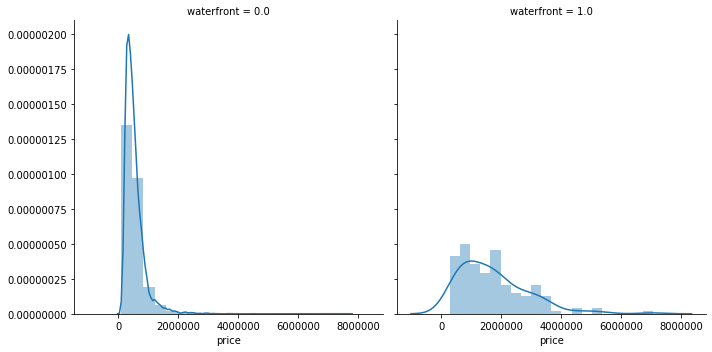

In [878]:
#sns.lmplot(x="waterfront", y="price", data=df_clean, line_kws={'color': 'red'})

g = sns.FacetGrid(df_clean, col="waterfront", margin_titles=True, height=5)
g = g.map(sns.distplot , "price", bins=20)

### As we can see from the price distribution for waterfront houses, although there are only few houses that are located in front of water, but they definitely has a big impact on the price and we dont drop them.

In [879]:
#sns.boxplot(x=df_clean["view"])
#sns.distplot(df_clean['view'], bins=40, kde=False, rug=True, color="red")

In [880]:
df_clean.view.value_counts().sort_index()

0.0    16972
1.0      288
2.0      807
3.0      425
4.0      285
Name: view, dtype: int64

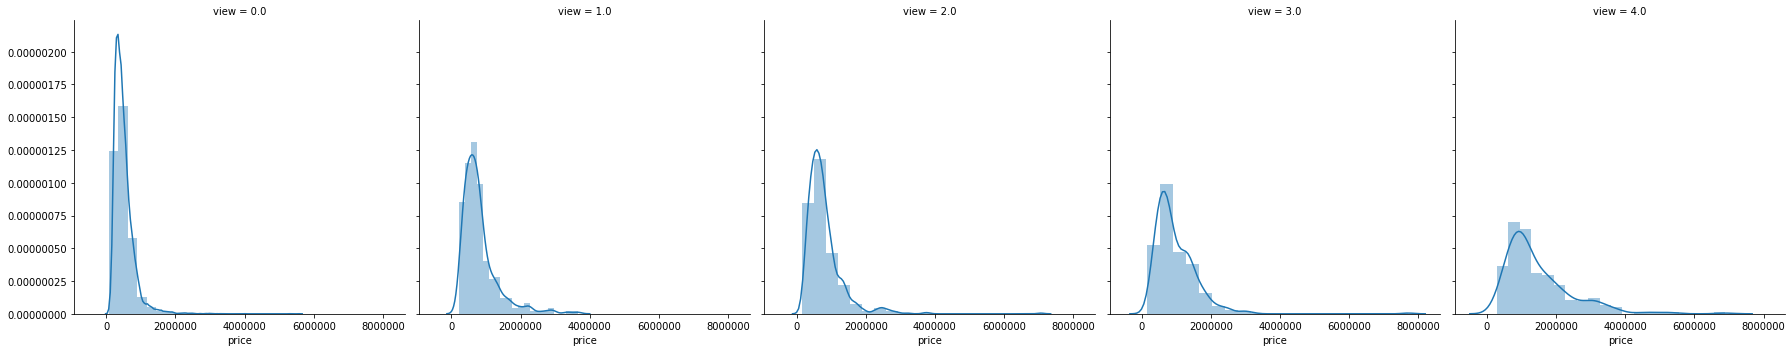

In [881]:
#sns.lmplot(x="view", y="price", data=df_clean, line_kws={'color': 'red'})
g = sns.FacetGrid(df_clean, col="view", margin_titles=True, height=5)
g = g.map(sns.distplot , "price", bins=20)

### as we can see from the price distribution, although there is no big difference for lower prices, but, the higher the price, more views are needed to sell the property, so we dont drop anything as there is no significant outliers here.

## 1c) dropping condition, grade and zipcode outliers :

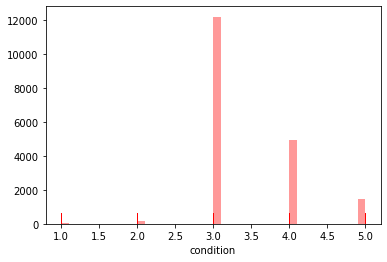

In [882]:
sns.distplot(df_clean['condition'], bins=40, kde=False, rug=True, color="red")

In [883]:
df_clean.condition.value_counts().sort_index()

1       24
2      148
3    12187
4     4941
5     1477
Name: condition, dtype: int64

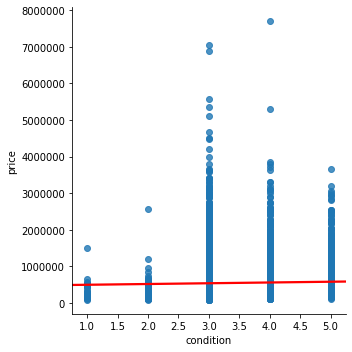

In [884]:
sns.lmplot(x="condition", y="price", data=df_clean, line_kws={'color': 'red'})

### Here, the fact that the line looks horizontal means that the input values (condition) are irrelevant to the output values (Price). we can pick any input value, and the output is always going to be right around the same value. So, we dont need to do further work on condition column as we will going to drop it.

In [885]:
#drop the condition
#df_clean.drop(["condition"], axis=1, inplace=False)

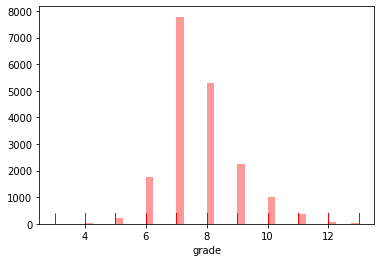

In [886]:
sns.distplot(df_clean['grade'], bins=40, kde=False, rug=True, color="red")

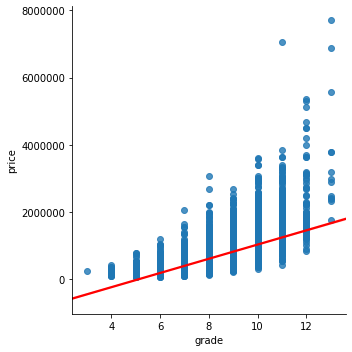

In [887]:
sns.lmplot(x="grade", y="price", data=df_clean, line_kws={'color': 'red'})

In [888]:
df_clean.grade.value_counts().sort_index()

3        1
4       25
5      205
6     1775
7     7787
8     5279
9     2266
10     995
11     350
12      81
13      13
Name: grade, dtype: int64

### clearly, overall grade given to the housing unit, based on King County grading system has impact on the price and we also see some outliers from both sides, 3 and 13. we are going to drop these two outliers:

In [889]:
df_clean = df_clean.loc[(df_clean['grade']<13)&(df_clean['grade']>3)]
df_clean['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4], dtype=int64)

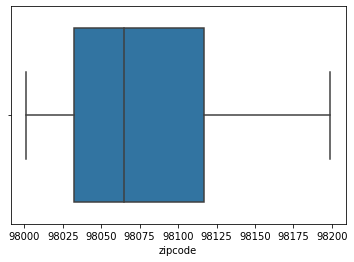

In [890]:
sns.boxplot(x=df_clean["zipcode"])

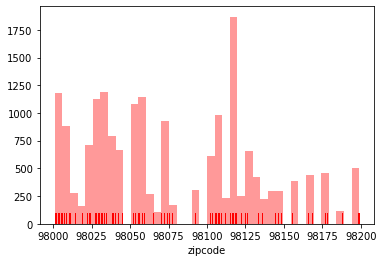

In [891]:
sns.distplot(df_clean['zipcode'], bins=40, kde=False, rug=True, color="red")

Although, zipcode does not have a complete normal distributtion, but it doesnt have significant outliers too.
still we need to further investigate the zipcode feature:

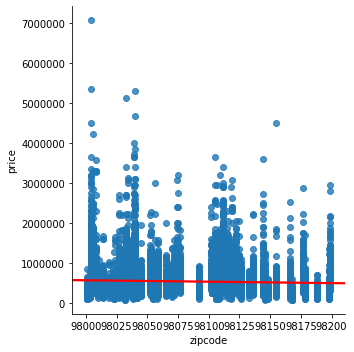

In [892]:
sns.lmplot(x="zipcode", y="price", data=df_clean, line_kws={'color': 'red'})

### the same as condition, the line here looks horizontal and it means that the input values (zipcode) are irrelevant to the output values (Price). we can pick any input value, and the output is always going to be right around the same value. So, we dont need to do further work on zipcode column as we will going to drop it.

In [893]:
#drop the zipcode
#df_clean.drop(["zipcode"], axis=1, inplace=False)

In [894]:
cat_feat=["bedrooms","bathrooms","floors","waterfront","view","condition","grade","zipcode"]
for i in cat_feat:
    print(df_clean[i].value_counts().sort_index())

1     169
2    2386
3    8542
4    6020
5    1397
6     216
7      33
Name: bedrooms, dtype: int64
0.5      67
1.0    3334
1.5    3931
2.0    3440
2.5    5733
3.0    1145
3.5     774
4.0     188
4.5     108
5.0      24
5.5      19
Name: bathrooms, dtype: int64
1.0    9287
1.5    1637
2.0    7174
2.5     135
3.0     530
Name: floors, dtype: int64
0.0    18621
1.0      142
Name: waterfront, dtype: int64
0.0    16966
1.0      288
2.0      804
3.0      423
4.0      282
Name: view, dtype: int64
1       24
2      148
3    12176
4     4939
5     1476
Name: condition, dtype: int64
4       25
5      205
6     1775
7     7787
8     5279
9     2266
10     995
11     350
12      81
Name: grade, dtype: int64
98001    320
98002    178
98003    249
98004    277
98005    157
98006    429
98007    119
98008    252
98010     85
98011    172
98014    108
98019    165
98022    204
98023    437
98024     73
98027    359
98028    251
98029    283
98030    230
98031    237
98032    114
98033    368
98034    

# 2.Dropping outliers from numerical variables:
### based on our infoemation from histplots we have few features which are numerical:
"sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "lat", "long", "sqft_living15" and  "sqft_lot15"

## 2a) dropping sqft_living, sqft_living15, sqft_lot, sqft_lot15 and sqft_above outliers :

In [895]:
#to have all three features in one box:
#df_clean[['sqft_lot', 'sqft_lot15', 'sqft_living']].plot(kind='box', vert=False, figsize=(15,5))

#sns.boxplot(x=df_clean["sqft_living"])

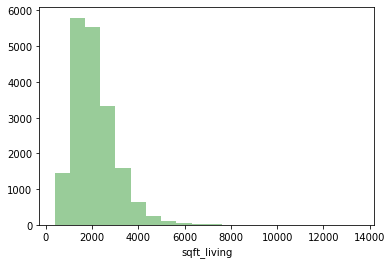

In [896]:
sns.distplot(df_clean['sqft_living'], bins=20, kde=False, rug=False, color="green")

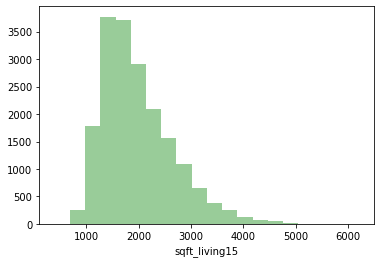

In [897]:
sns.distplot(df_clean['sqft_living15'], bins=20, kde=False, rug=False, color="green")

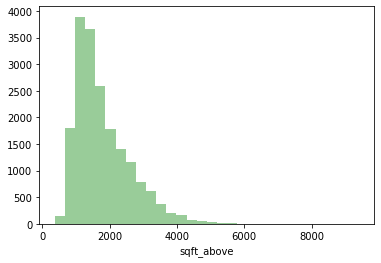

In [898]:
sns.distplot(df_clean['sqft_above'], bins=30, kde=False, rug=False, color="green")

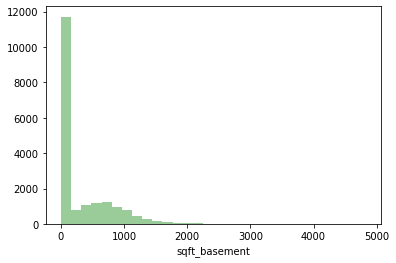

In [899]:
sns.distplot(df_clean['sqft_basement'], bins=30, kde=False, rug=False, color="green")

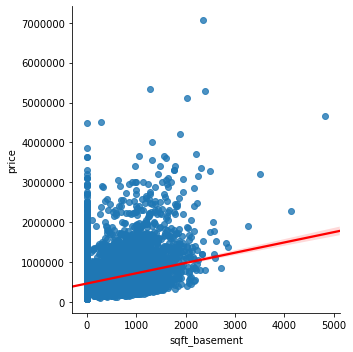

In [900]:
sns.lmplot(x="sqft_basement", y="price", data=df_clean, line_kws={'color': 'red'})

In [901]:
df_clean.sqft_basement.value_counts().sort_index()

0.0       11394
10.0          1
20.0          1
40.0          4
50.0         10
60.0          8
70.0          5
80.0         19
90.0         19
100.0        38
110.0        15
120.0        47
130.0        24
140.0        50
143.0         1
145.0         4
150.0        42
160.0        25
170.0        25
172.0         1
176.0         1
180.0        37
190.0        30
200.0        97
207.0         1
210.0        24
220.0        39
225.0         1
230.0        10
235.0         2
240.0        65
243.0         1
248.0         1
250.0        46
260.0        40
265.0         3
266.0         1
270.0        40
274.0         1
276.0         1
280.0        54
283.0         1
290.0        60
295.0         1
300.0       125
310.0        51
320.0        34
330.0        45
340.0        58
350.0        60
360.0        66
370.0        38
374.0         1
380.0        62
390.0        42
400.0       165
410.0        20
414.0         2
415.0         1
417.0         1
420.0        77
430.0        53
435.0   

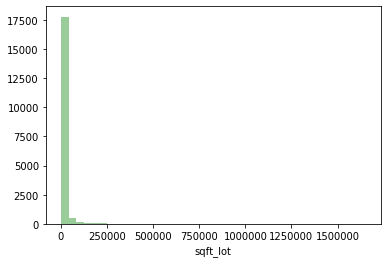

In [902]:
sns.distplot(df_clean['sqft_lot'], bins=40, kde=False, rug=False, color="green")

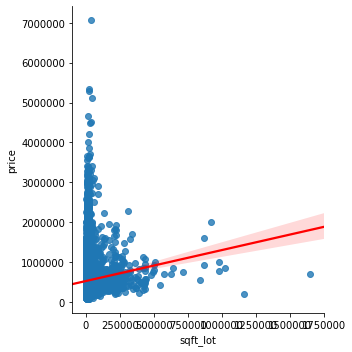

In [903]:
sns.lmplot(x="sqft_lot", y="price", data=df_clean, line_kws={'color': 'red'})

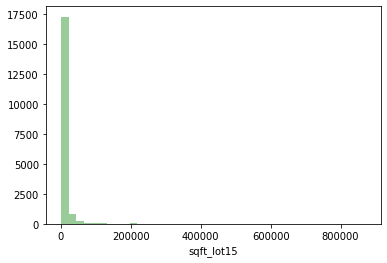

In [904]:
sns.distplot(df_clean['sqft_lot15'], bins=40, kde=False, rug=False, color="green")

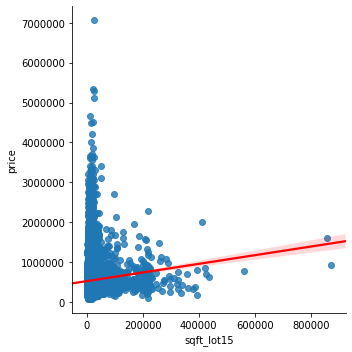

In [905]:
sns.lmplot(x="sqft_lot15", y="price", data=df_clean, line_kws={'color': 'red'})

### based on observations above, we have outliers in all 5 features:

1. for sqft_lot & sqft_lot15 we will Removed outliers where square footage is >100,000.
2. for sqft_living we will remove outliers where living space is >6000.
3. for sqft_living15 we will remove outliers where living space is >5000.
4. for sqft_above(square footage of house apart from basement) we will remove outliers where living space is >5000.


Also, sqft_lot and sqft_lot15 do not have a big imfact on the price, so if there is any multicollinearity caused by any of these two features, we are ready to drop them.

In [906]:
df_clean = df_clean.loc[df_clean['sqft_living']<6000]
df_clean = df_clean.loc[df_clean['sqft_living15']<5000]
df_clean = df_clean.loc[df_clean['sqft_above']<5000]
df_clean = df_clean.loc[df_clean['sqft_lot']<100000]
df_clean = df_clean.loc[df_clean['sqft_lot15']<100000]

#df_clean['sqft_living'].value_counts()
#df_clean['sqft_lot'].value_counts()
#df_clean['sqft_lot15'].value_counts()

## 2b) dropping lat and long outliers :

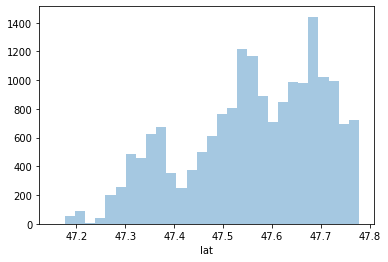

In [907]:
sns.distplot(df_clean['lat'], bins=30, kde=False, rug=False)

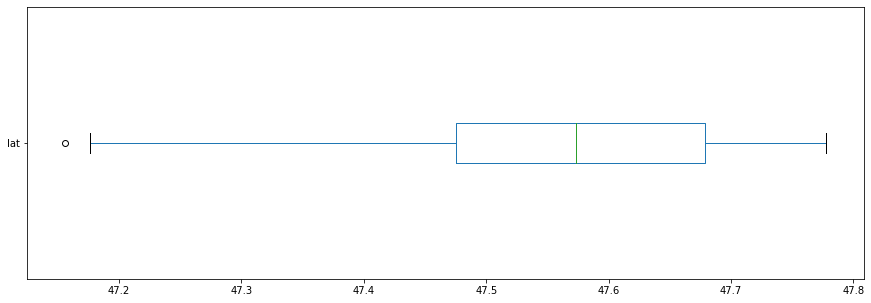

In [908]:
df_clean[['lat']].plot(kind='box', vert=False, figsize=(15,5))

In [909]:
df_clean.lat.value_counts().sort_index().head(150)

47.1559    1
47.1764    1
47.1775    1
47.1803    1
47.1853    1
47.1895    1
47.1896    1
47.1900    2
47.1903    1
47.1913    2
47.1923    1
47.1924    1
47.1927    3
47.1928    1
47.1932    1
47.1937    2
47.1938    1
47.1940    1
47.1941    1
47.1942    1
47.1943    1
47.1944    2
47.1946    2
47.1947    2
47.1948    4
47.1949    3
47.1951    2
47.1952    2
47.1955    2
47.1956    2
47.1958    4
47.1959    1
47.1960    1
47.1964    1
47.1967    2
47.1969    1
47.1976    1
47.1981    1
47.1983    1
47.1985    1
47.1986    1
47.1996    1
47.2003    1
47.2004    1
47.2005    1
47.2008    1
47.2010    1
47.2012    1
47.2015    1
47.2016    1
47.2020    1
47.2021    2
47.2025    1
47.2026    1
47.2027    1
47.2034    1
47.2039    1
47.2041    1
47.2043    2
47.2046    1
47.2048    1
47.2050    2
47.2051    1
47.2052    1
47.2053    1
47.2056    1
47.2057    1
47.2058    1
47.2062    1
47.2063    1
47.2064    1
47.2068    1
47.2073    1
47.2074    1
47.2077    2
47.2078    1
47.2079    1

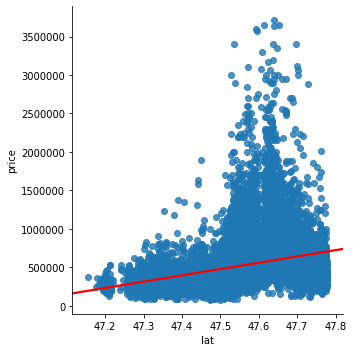

In [910]:
sns.lmplot(x="lat", y="price", data=df_clean, line_kws={'color': 'red'})  

we will cut off anything South of 47.1945 from Latitude coordinate (north-south):

In [911]:
df_clean = df_clean.loc[df_clean['lat']>47.1945]
#df_clean.lat.value_counts().sort_index()

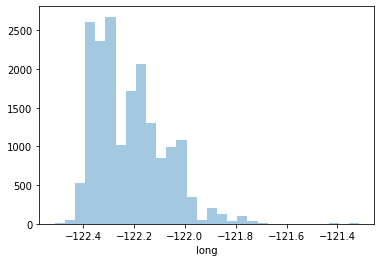

In [912]:
#sns.boxplot(x=df_clean["long"])
sns.distplot(df_clean['long'], bins=30, kde=False, rug=False)

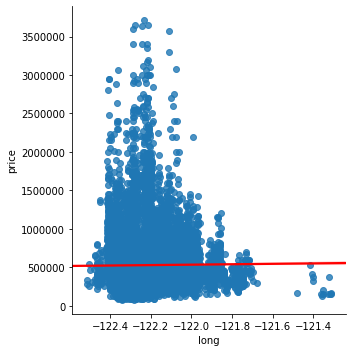

In [913]:
sns.lmplot(x="long", y="price", data=df_clean, line_kws={'color': 'red'})  

### the Longitude coordinate (eastern-western) doesnt have any impact on the price of the property, so we do not need to do further work on that as we will drop it.

In [914]:
#drop
#df_clean.drop(["long"], axis=1, inplace=False)

## 2c) dropping yr_renovated , yr_built and date outliers:

In [915]:
#to show both features in one box:
#df_clean[['yr_renovated', 'yr_built']].plot(kind='box', vert=False, figsize=(15,2))

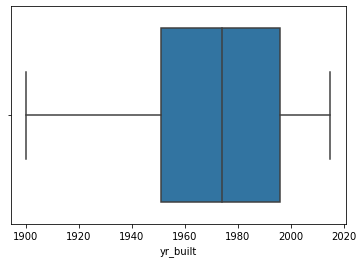

In [916]:
sns.boxplot(x=df_clean["yr_built"])

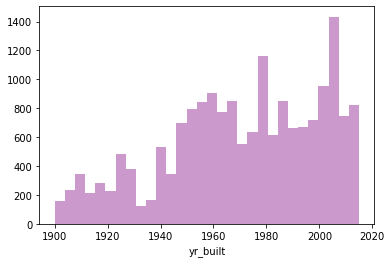

In [917]:
sns.distplot(df_clean['yr_built'], bins=30, kde=False, rug=False, color="purple")

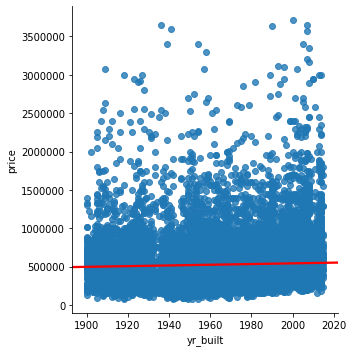

In [918]:
sns.lmplot(x="yr_built", y="price", data=df_clean, line_kws={'color': 'red'})  

### year_built has no significant effect on the price, so we will drop this feature. 

In [ ]:
#drop
#df_clean.drop(["yr_built"], axis=1, inplace=False)

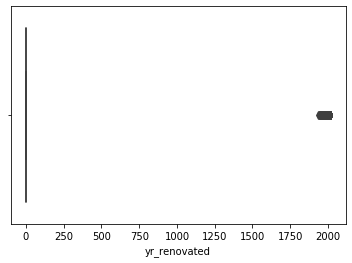

In [919]:
sns.boxplot(x=df_clean["yr_renovated"])

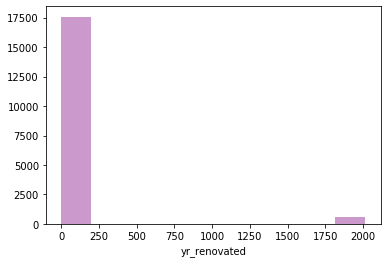

In [920]:
sns.distplot(df_clean['yr_renovated'], bins=10, kde=False, rug=False, color="purple")

In [836]:
df_clean.yr_renovated.value_counts().sort_index()

0.0       17575
1934.0        1
1940.0        2
1944.0        1
1945.0        1
1948.0        1
1950.0        1
1951.0        1
1953.0        1
1954.0        1
1955.0        2
1956.0        2
1957.0        2
1958.0        3
1959.0        1
1960.0        2
1962.0        1
1963.0        3
1964.0        5
1965.0        3
1967.0        1
1968.0        4
1969.0        4
1970.0        8
1971.0        1
1972.0        3
1973.0        4
1974.0        1
1975.0        5
1976.0        1
1977.0        7
1978.0        3
1979.0        6
1980.0        6
1981.0        3
1982.0        6
1983.0       11
1984.0       13
1985.0       10
1986.0       10
1987.0       12
1988.0       10
1989.0       14
1990.0       20
1991.0       11
1992.0       11
1993.0       10
1994.0       12
1995.0        8
1996.0       10
1997.0       10
1998.0       14
1999.0       11
2000.0       24
2001.0       10
2002.0       14
2003.0       23
2004.0       17
2005.0       27
2006.0       18
2007.0       22
2008.0       14
2009.0  

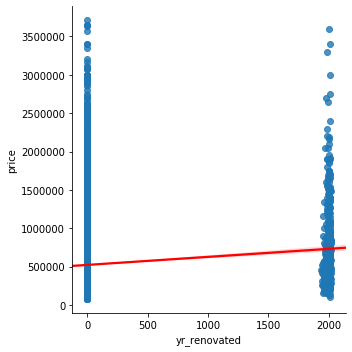

In [921]:
sns.lmplot(x="yr_renovated", y="price", data=df_clean, line_kws={'color': 'red'})  

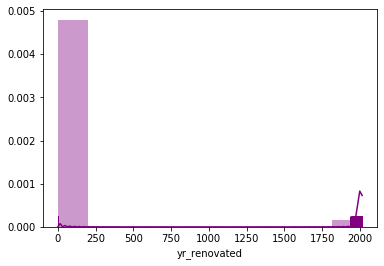

In [923]:
sns.distplot(df_clean['yr_renovated'], bins=10, kde=True, rug=True, color="purple")

### Based on our observations: the year renovated has lots of 0's, which are considered as "no renovation at all". Thus, the best way to deal with these values are to replace them with the corresponding yr_built:

In [924]:
#df_clean1 = df_clean.copy()
df_clean['yr_renovated'] = df_clean.apply(lambda x : x['yr_built'] if(x['yr_renovated'] == 0.0) else x['yr_renovated'], axis=1)
#print(df_clean1['yr_renovated'],df_clean1['yr_built'])
df_clean['yr_renovated'].unique()

array([1991., 1933., 1965., 1987., 1963., 1960., 2003., 1942., 1927.,
       1977., 1900., 1979., 1994., 1916., 1969., 1947., 1968., 1995.,
       1985., 1941., 1915., 1909., 1948., 2005., 1929., 1981., 2002.,
       1904., 1996., 1984., 1922., 1959., 1966., 1953., 1955., 1950.,
       2008., 1954., 2014., 1925., 1973., 1972., 1986., 1956., 1992.,
       1964., 1952., 1961., 2006., 1988., 2001., 1962., 1939., 1967.,
       1975., 1910., 2010., 1905., 1971., 1945., 1990., 1978., 1926.,
       2004., 1923., 2013., 2000., 1976., 1949., 1999., 1980., 1901.,
       1993., 1920., 1997., 1983., 1940., 1918., 1928., 1974., 1911.,
       1930., 1936., 1937., 1982., 1908., 1931., 1957., 1998., 1913.,
       1921., 1943., 1924., 1989., 1958., 2011., 2007., 1917., 1951.,
       1932., 1946., 1902., 1944., 1970., 2015., 2012., 1934., 1938.,
       2009., 1919., 1914., 1906., 1912., 1907., 1903., 1935.])

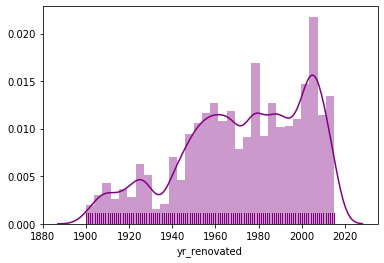

In [925]:
sns.distplot(df_clean['yr_renovated'], bins=30, kde=True, rug=True, color="purple")

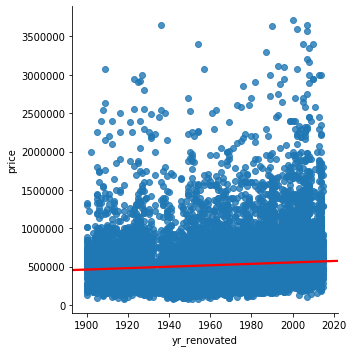

In [926]:
sns.lmplot(x="yr_renovated", y="price", data=df_clean, line_kws={'color': 'red'})

### now we can see that the distribution of yr_renovated has changed significantly after the changes we made.

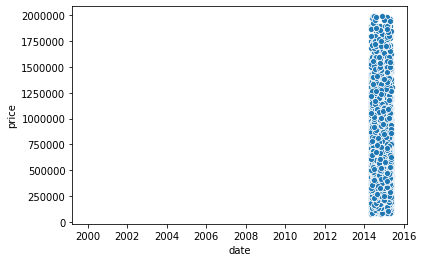

In [936]:
sns.scatterplot(df_clean['date'], df_clean['price'])
plt.show()

### As we can see, date and price has a steady relationship, so we can also drop the date feature.

In [ ]:
#drop date
#df_clean.drop(["date"], axis=1, inplace=False)

# 3. Check for target variable (Price) disctibution and outliers:

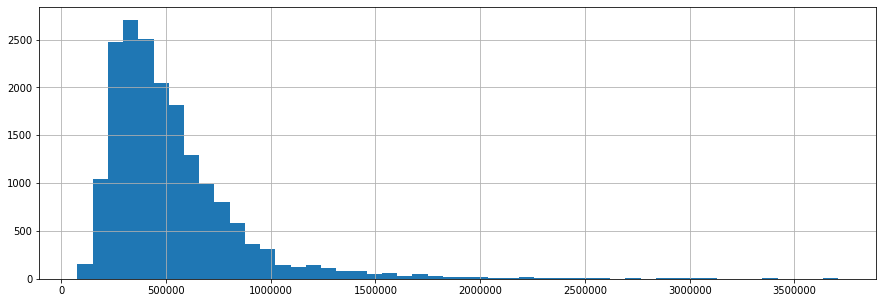

In [927]:
#sns.boxplot(x=df_clean["price"])
df_clean['price'].hist(figsize=(15,5),bins=50)
#sns.distplot(df_clean['price'], bins=10, kde=False, rug=False, color= "#34495e")

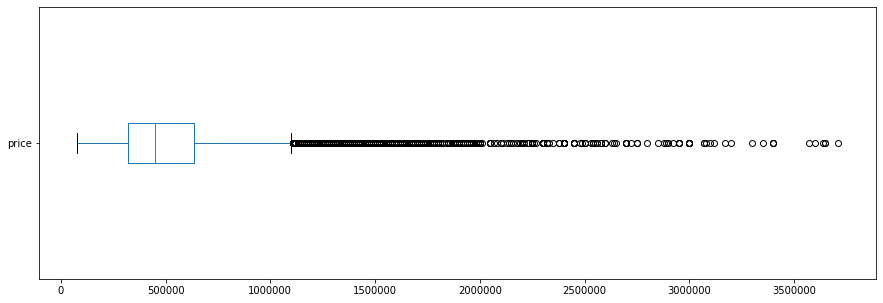

In [928]:
df_clean[['price']].plot(kind='box', vert=False, figsize=(15,5))

There are so many outliers for the price variable. for further investigation, we are going to calculate the price mean and standard deviation first

In [929]:
import statistics
print('mean = ', df_clean.price.mean())
print('std = ', df_clean.price.std())
print("varianve = ", statistics.variance(df_clean.price))

up_lim = (df_clean.price.mean() + (3*df_clean.price.std()))
print('upper limit = ', up_lim)

mean =  528861.4354687929
std =  331423.54241110705
varianve =  109841564464.3258
upper limit =  1523132.062702114


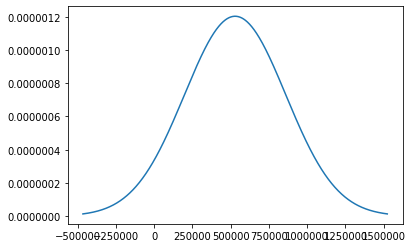

In [930]:
import scipy.stats as stats
import math

mu = 528861.4354687929
variance = 109841564464.3258
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

In [931]:
df_clean.price.value_counts().sort_index()

78000.0      1
82000.0      1
82500.0      1
83000.0      1
84000.0      1
            ..
3570000.0    1
3600000.0    1
3640000.0    1
3650000.0    2
3710000.0    1
Name: price, Length: 3297, dtype: int64

So to be safe, we can drop price outliers larger than on our upper limit:

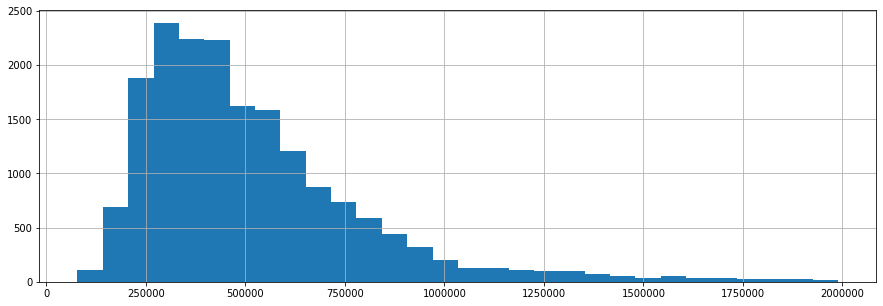

In [932]:
df_clean = df_clean.loc[df_clean['price']<2000000]
df_clean['price'].hist(figsize=(15,5),bins=30)

### Our data cleaning process is now complete, next step is to prepare data for linear regression requirement.
Befor moving to the next step, we drop all the unnecessary columns we found during data cleaning:
1. numerical features: "id" , "date", "yr_built" , "long"
2. categorical features: "condition" , "Zipcode"


we will keep the long column just for the sake of plotting geographical columns.

In [937]:
df_clean=df_clean.drop(["id","date","yr_built","zipcode","condition"],axis=1, inplace=False)
df_clean

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15
1,538000.0,3,2.0,2570,7242,2.0,0.0,0.0,7,2170,400.0,1991.0,47.7210,-122.319,1690,7639
2,180000.0,2,1.0,770,10000,1.0,0.0,0.0,6,770,0.0,1933.0,47.7379,-122.233,2720,8062
3,604000.0,4,3.0,1960,5000,1.0,0.0,0.0,7,1050,910.0,1965.0,47.5208,-122.393,1360,5000
4,510000.0,3,2.0,1680,8080,1.0,0.0,0.0,8,1680,0.0,1987.0,47.6168,-122.045,1800,7503
7,291850.0,3,1.5,1060,9711,1.0,0.0,0.0,7,1060,0.0,1963.0,47.4095,-122.315,1650,9711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.5,1310,1294,2.0,0.0,0.0,8,1180,130.0,2008.0,47.5773,-122.409,1330,1265
21592,360000.0,3,2.5,1530,1131,3.0,0.0,0.0,8,1530,0.0,2009.0,47.6993,-122.346,1530,1509
21593,400000.0,4,2.5,2310,5813,2.0,0.0,0.0,8,2310,0.0,2014.0,47.5107,-122.362,1830,7200
21594,402101.0,2,0.5,1020,1350,2.0,0.0,0.0,7,1020,0.0,2009.0,47.5944,-122.299,1020,2007


# 5. Save cleaned dataframe for use in other notebooks
We are apt to save the current final cleaned version of the dataset as another csv files through pickle.

In [956]:
#Write data to file
with open('df_clean.pickle','wb') as f:
    pickle.dump(df_clean,f,pickle.HIGHEST_PROTOCOL)

In [957]:
#Verify that pickle worked
with open('df_clean.pickle','rb') as f_read:
    df_clean_from_pickle = pickle.load(f_read)

In [958]:
print(df_clean_from_pickle.shape)
df_clean_from_pickle.head()

(18050, 16)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15
1,538000.0,3,2.0,2570,7242,2.0,0.0,0.0,7,2170,400.0,1991.0,47.7210,-122.319,1690,7639
2,180000.0,2,1.0,770,10000,1.0,0.0,0.0,6,770,0.0,1933.0,47.7379,-122.233,2720,8062
3,604000.0,4,3.0,1960,5000,1.0,0.0,0.0,7,1050,910.0,1965.0,47.5208,-122.393,1360,5000
4,510000.0,3,2.0,1680,8080,1.0,0.0,0.0,8,1680,0.0,1987.0,47.6168,-122.045,1800,7503
7,291850.0,3,1.5,1060,9711,1.0,0.0,0.0,7,1060,0.0,1963.0,47.4095,-122.315,1650,9711


We are ready for the next step.